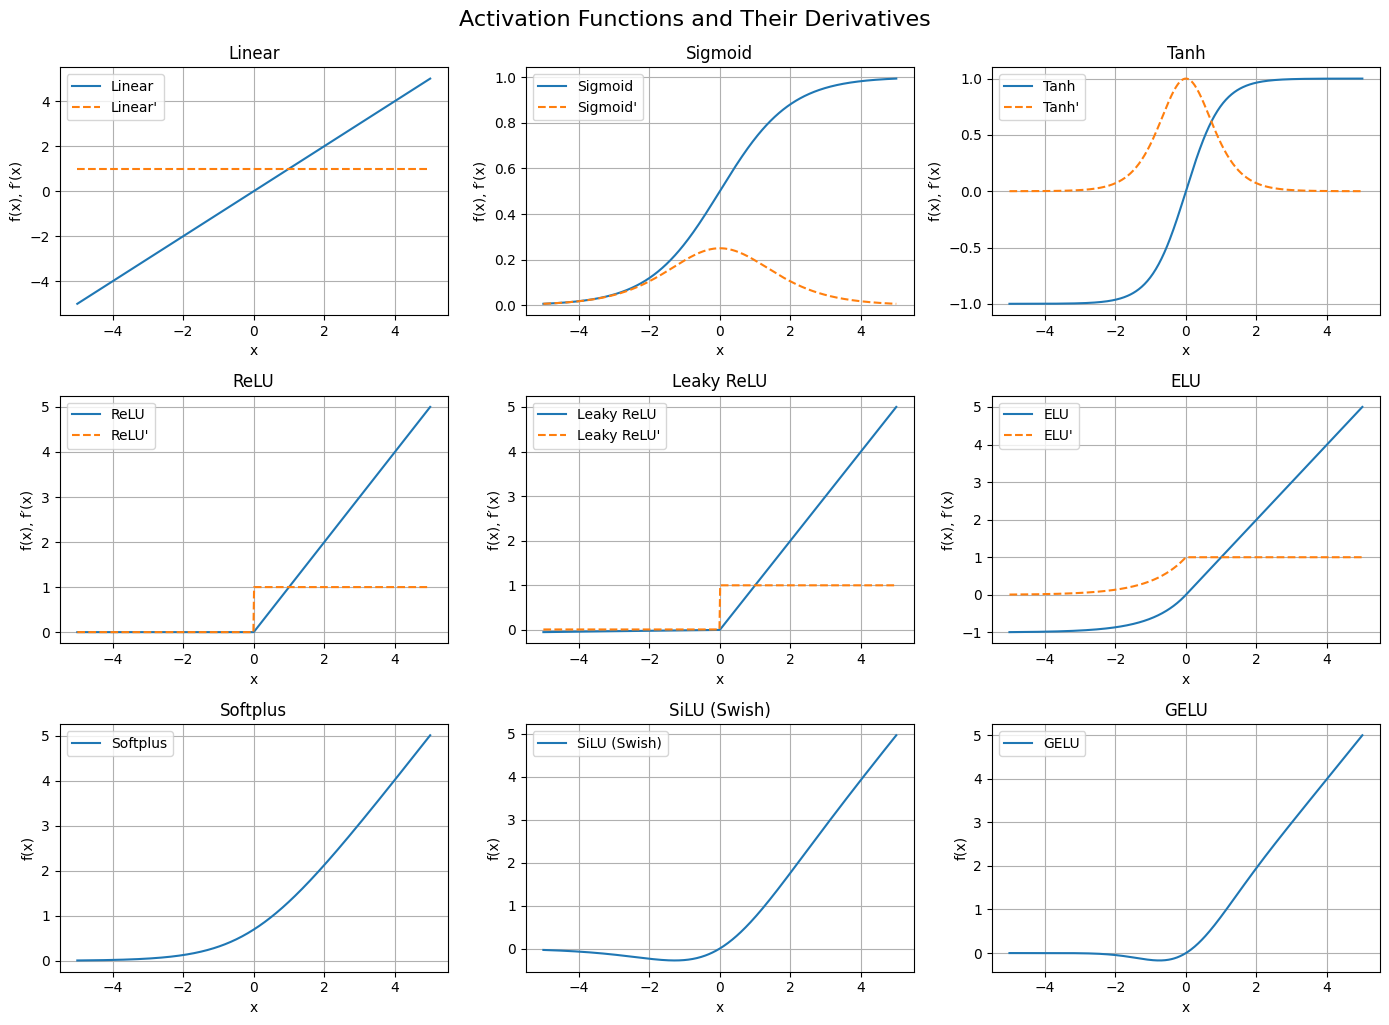

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# 1. Define a suite of activation functions (PyTorch & NumPy)
activations = {
    "Linear": (lambda x: x, lambda x: np.ones_like(x)),
    "Sigmoid": (lambda x: 1/(1+np.exp(-x)), lambda x: (1/(1+np.exp(-x))) * (1 - 1/(1+np.exp(-x)))),
    "Tanh": (np.tanh, lambda x: 1 - np.tanh(x)**2),
    "ReLU": (lambda x: np.maximum(0, x), lambda x: np.where(x > 0, 1, 0)),
    "Leaky ReLU": (lambda x: np.where(x > 0, x, 0.01 * x), lambda x: np.where(x > 0, 1, 0.01)),
    "ELU": (lambda x, α=1.0: np.where(x > 0, x, α*(np.exp(x)-1)),
            lambda x, α=1.0: np.where(x > 0, 1, α * np.exp(x))),
}

# 2. Plug in smooth plus advanced functions via PyTorch (for plotting)
torch_acts = {
    "Softplus": nn.Softplus(),
    "SiLU (Swish)": nn.SiLU(),
    "GELU": nn.GELU(),
}

# Create input range
x = np.linspace(-5, 5, 500)

# Plot static functions (NumPy)
plt.figure(figsize=(14, 10))
n = len(activations) + len(torch_acts)
cols = 3
rows = int(np.ceil(n / cols))
i = 1
for name, funcs in activations.items():
    func, deriv = funcs
    y = func(x)
    dy = deriv(x)
    plt.subplot(rows, cols, i)
    plt.plot(x, y, label=name)
    plt.plot(x, dy, '--', label=f"{name}'")
    plt.title(name)
    plt.xlabel('x')
    plt.ylabel('f(x), f′(x)')
    plt.legend()
    plt.grid(True)
    i += 1

# Plot PyTorch-based smooth activations (only output curve)
for name, module in torch_acts.items():
    xx = torch.linspace(-5,5,500)
    yy = module(xx).detach().numpy()
    plt.subplot(rows, cols, i)
    plt.plot(xx.numpy(), yy, label=name)
    plt.title(name)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    i += 1

plt.tight_layout()
plt.suptitle("Activation Functions and Their Derivatives", fontsize=16, y=1.02)
plt.show()